In [1]:
%matplotlib inline
import numpy as np
import lib.io.stan
import matplotlib.pyplot as plt
import os

## Patient AC

In [2]:
np.random.seed(0)
data_dir = 'datasets/id001_ac'
res_dir = 'results/exp10/exp10.3'
os.makedirs(res_dir,exist_ok=True)

ntwrk = np.load(f'{data_dir}/AC_network.npz')
SC = ntwrk['SC']
gain = ntwrk['gain_mat']
sim_data_6d_ep = np.load(f'{data_dir}/AC_syn_tvb_ez=59_pz=82-74.npz')

nn = SC.shape[0]
ns  = gain.shape[0]
nt = 10000
I1 = 3.1
tau0 = 2857.0
x0 = sim_data_6d_ep['x0']
time_scale = 1.0
time_step = 0.1
nsteps = int(1.0 / time_step)
sigma = 0.0001
k = 1.0
epsilon = 0.01
x_init = -2.0*np.ones(nn)
z_init = 3.5*np.ones(nn)
z_eta = np.random.normal(size = (nt, nn))

data = {'nn':nn, 'ns':ns, 'nt':nt, 'I1':I1, 'tau0':tau0, 'SC':SC, 'gain':gain,
        'x0':x0, 'time_scale':time_scale, 'time_step':time_step, 'nsteps':nsteps,
        'sigma':sigma, 'k':k, 'epsilon':epsilon, 'x_init':x_init, 'z_init':z_init, 'z_eta':z_eta}

lib.io.stan.rdump(f'{res_dir}/AC_fit_data.R',data)

cmd = 'bash /home/anirudhnihalani/scripts/stancompile.sh vep-forwardsim-2Depileptor'
lib.io.stan.create_process(cmd.split(' '), block = True)
cmd = f"./vep-forwardsim-2Depileptor sample num_warmup=0 num_samples=1 algorithm=fixed_param data file={res_dir}/AC_fit_data.R output file={res_dir}/AC_2D_sim.csv"
lib.io.stan.create_process(cmd.split(' '), block = True)

/home/anirudhnihalani/vep.stan
make: `/home/anirudhnihalani/vep.stan/vep-forwardsim-2Depileptor' is up to date.
method = sample (Default)
  sample
    num_samples = 1
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)
      init_buffer = 75 (Default)
      term_buffer = 50 (Default)
      window = 25 (Default)
    algorithm = fixed_param
id = 0 (Default)
data
  file = results/exp10/exp10.3/AC_fit_data.R
init = 2 (Default)
random
  seed = 2585489301
output
  file = results/exp10/exp10.3/AC_2D_sim.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)

Iteration: 1 / 1 [100%]  (Sampling)

 Elapsed Time: 0 seconds (Warm-up)
               16.87 seconds (Sampling)
               16.87 seconds (Total)



0

#### Load the simulated data

In [3]:
sim_data_2D_ep = lib.io.stan.read_samples(f'{res_dir}/AC_2D_sim.csv',0,1,ignore_warmup=True,variables_of_interest=['x'])

#### Compare the source activity between 2D and 6D epileptor simulations

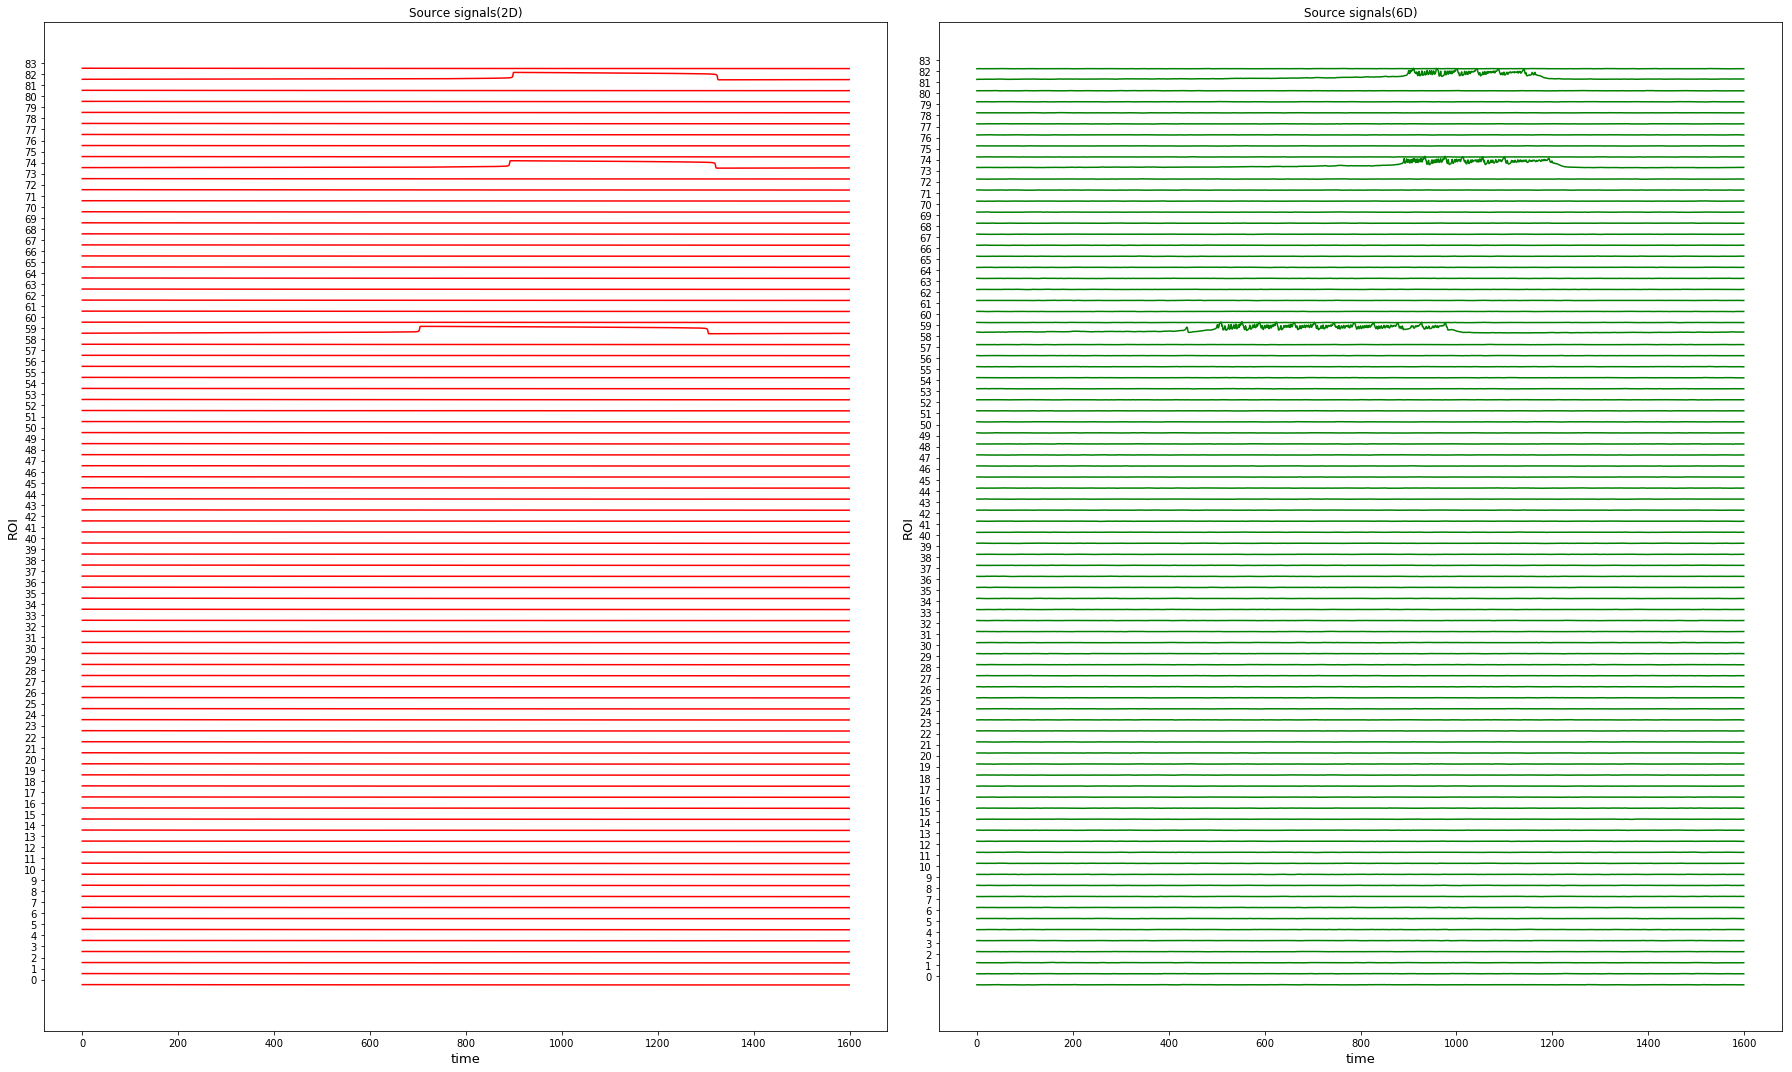

In [4]:
plt.figure(figsize=(25,15))
plt.subplot(121)
src_sig = sim_data_2D_ep['x'][0,0:1600,:]
plt.plot(src_sig/4.0 + np.r_[0:nn],'r')
plt.yticks(np.r_[0:nn],np.r_[0:nn]);
plt.ylabel('ROI',fontsize=13);
plt.xlabel('time',fontsize=13);
plt.title('Source signals(2D)');
plt.subplot(122)
src_sig = sim_data_6d_ep['src_sig'][2200:3800,0,:,0] + sim_data_6d_ep['src_sig'][2200:3800,3,:,0]
plt.plot(src_sig/4.0 + np.r_[0:nn],'g')
plt.ylabel('ROI',fontsize=13);
plt.xlabel('time',fontsize=13);
plt.yticks(np.r_[0:nn],np.r_[0:nn]);
plt.title('Source signals(6D)')
plt.tight_layout()


## Patient CJ

In [6]:
%reset -f

%matplotlib inline
import numpy as np
import lib.io.stan
import matplotlib.pyplot as plt
import os

np.random.seed(0)
data_dir = 'datasets/id002_cj'
res_dir = 'results/exp10/exp10.3'
os.makedirs(res_dir,exist_ok=True)

ntwrk = np.load(f'{data_dir}/CJ_network.npz')
SC = ntwrk['SC']
gain = ntwrk['gain_mat']
sim_data_6d_ep = np.load(f'{data_dir}/CJ_syn_tvb_ez=6-34_pz=27-5-11.npz')

nn = SC.shape[0]
ns  = gain.shape[0]
nt = 10000
I1 = 3.1
tau0 = 2857.0
x0 = sim_data_6d_ep['x0']
time_scale = 1.0
time_step = 0.1
nsteps = int(1.0 / time_step)
sigma = 0.0001
k = 1.0
epsilon = 0.01
x_init = -2.0*np.ones(nn)
z_init = 3.5*np.ones(nn)
z_eta = np.random.normal(size = (nt, nn))

data = {'nn':nn, 'ns':ns, 'nt':nt, 'I1':I1, 'tau0':tau0, 'SC':SC, 'gain':gain,
        'x0':x0, 'time_scale':time_scale, 'time_step':time_step, 'nsteps':nsteps,
        'sigma':sigma, 'k':k, 'epsilon':epsilon, 'x_init':x_init, 'z_init':z_init, 'z_eta':z_eta}

lib.io.stan.rdump(f'{res_dir}/CJ_fit_data.R',data)

cmd = 'bash /home/anirudhnihalani/scripts/stancompile.sh vep-forwardsim-2Depileptor'
lib.io.stan.create_process(cmd.split(' '), block = True)
cmd = f'./vep-forwardsim-2Depileptor sample num_warmup=0 num_samples=1 algorithm=fixed_param data file={res_dir}/CJ_fit_data.R output file={res_dir}/CJ_2D_sim.csv'
lib.io.stan.create_process(cmd.split(' '), block = True)

/home/anirudhnihalani/vep.stan
make: `/home/anirudhnihalani/vep.stan/vep-forwardsim-2Depileptor' is up to date.
method = sample (Default)
  sample
    num_samples = 1
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)
      init_buffer = 75 (Default)
      term_buffer = 50 (Default)
      window = 25 (Default)
    algorithm = fixed_param
id = 0 (Default)
data
  file = results/exp10/exp10.3/CJ_fit_data.R
init = 2 (Default)
random
  seed = 2585553886
output
  file = results/exp10/exp10.3/CJ_2D_sim.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)

Iteration: 1 / 1 [100%]  (Sampling)

 Elapsed Time: 0 seconds (Warm-up)
               16.89 seconds (Sampling)
               16.89 seconds (Total)



0

#### Load simulated data

In [8]:
sim_data_2D_ep = lib.io.stan.read_samples(f'{res_dir}/CJ_2D_sim.csv',0,1,ignore_warmup=True,variables_of_interest=['x'])

#### Compare the source activity between 2D and 6D epileptor simulations

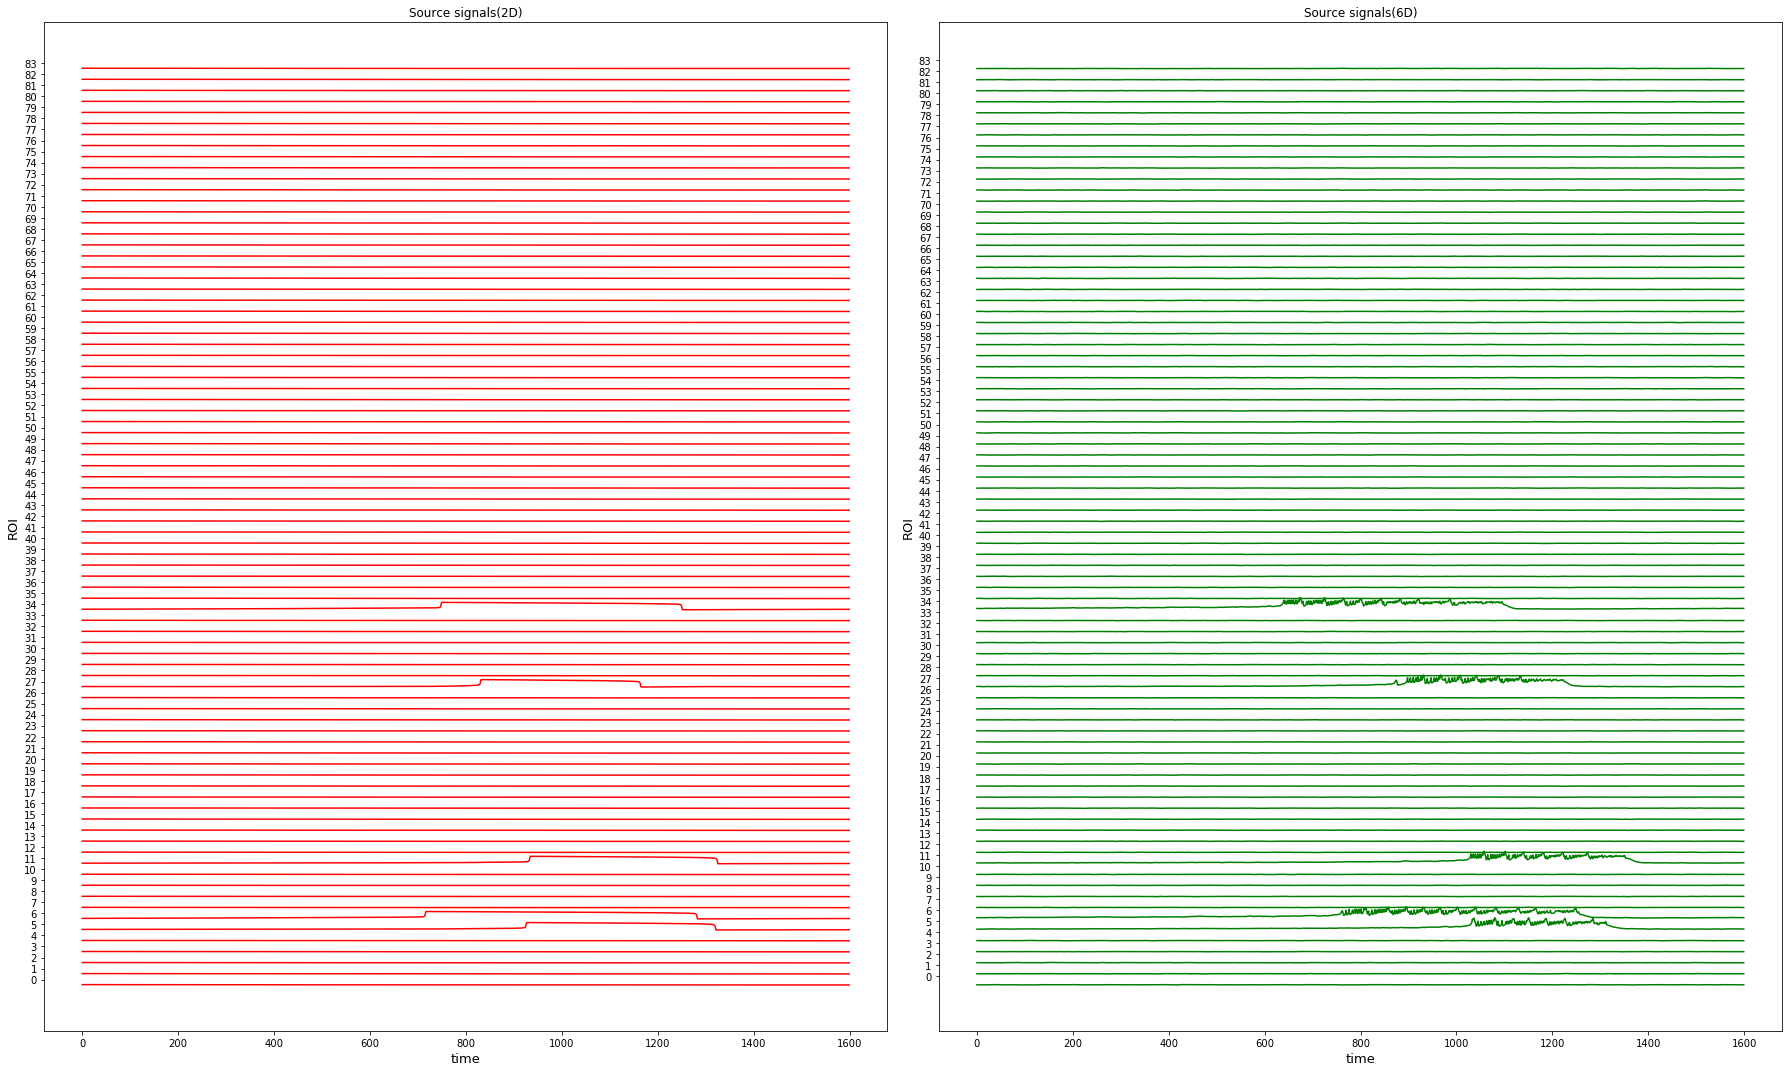

In [9]:
plt.figure(figsize=(25,15))
plt.subplot(121)
src_sig = sim_data_2D_ep['x'][0,0:1600,:]
plt.plot(src_sig/4.0 + np.r_[0:nn],'r')
plt.yticks(np.r_[0:nn],np.r_[0:nn]);
plt.ylabel('ROI',fontsize=13);
plt.xlabel('time',fontsize=13);
plt.title('Source signals(2D)');
plt.subplot(122)
src_sig = sim_data_6d_ep['src_sig'][2200:3800,0,:,0] + sim_data_6d_ep['src_sig'][2200:3800,3,:,0]
plt.plot(src_sig/4.0 + np.r_[0:nn],'g')
plt.ylabel('ROI',fontsize=13);
plt.xlabel('time',fontsize=13);
plt.yticks(np.r_[0:nn],np.r_[0:nn]);
plt.title('Source signals(6D)')
plt.tight_layout()